In [2]:
# 需要安装的包
!pip install pillow numpy opencv-python pds4-tools colour-demosaicing colour-science scikit-image -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 274 kB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.6 MB 13.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 12.6 MB/s eta 0:00:01
     |████████████████████████████████| 29.2 MB 10.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 13.1 MB/s eta 0:00:01
     |████████████████████████████████| 27.4 MB 10.6 MB/s eta 0:00:01
     |████████████████████████████████| 165 kB 12.6 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 12.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 13.1 MB/s eta 0:00:01
  Attempting uninstall: decorator
    Found existing installation: decorator 5.0.7
    Uninstalling decorator-5.0.7:
      Successfully uninstalled decorator-5.0.7


# 解析pds数据

In [3]:
from PIL import Image
import numpy as np
import pds4_tools
import colour
import colour_demosaicing
from skimage import exposure

img = {}

filename = 'data/CE4_GRAS_PCAML-C-000_SCI_N_20200329050227_20200329050227_0124_B.2BL'
#filename = 'CE4_GRAS_PCAML-C-001_SCI_N_20190708043517_20190708043517_0048_B'
#filename = 'CE4_GRAS_PCAML-C-002_SCI_N_20190708043636_20190708043636_0048_B'
#filename = 'CE4_GRAS_PCAML-C-003_SCI_N_20190708044006_20190708044006_0048_B'
#filename = 'CE4_GRAS_PCAML-C-004_SCI_N_20190708044125_20190708044125_0048_B'
#filename = 'CE4_GRAS_PCAML-C-005_SCI_N_20190708044244_20190708044244_0048_B'


# 读入嫦娥4号2BL数据
img['pds_data'] = pds4_tools.read(filename)

Processing label: data/CE4_GRAS_PCAML-C-000_SCI_N_20200329050227_20200329050227_0124_B.2BL
Now processing a Array_2D_Image structure: ARRAY_0


In [5]:
# 将图像数据提取出来
img['raw_data'] = np.asanyarray(img['pds_data'][0].data)
print(img['raw_data'].shape, img['raw_data'].ndim)
img['raw_data'] = img['raw_data'] / 1023      #10位的图像数据归一化 
# 保存数据到图片
p = img['raw_data'] * 255
p = p.astype('uint8')
img['pil'] = Image.fromarray(p)
img['pil'].save(filename.replace('data', 'png') + '_0.png')

(1728, 2352) 2


In [6]:
# de-bayer
rgb_data = colour.cctf_encoding(colour_demosaicing.demosaicing_CFA_Bayer_bilinear(img['raw_data'], 'RGGB')) 
print(rgb_data.shape, rgb_data.ndim)
img['rgb_data'] = rgb_data
p = img['rgb_data'] * 255
p = p.astype('uint8')
img['pil'] = Image.fromarray(p)
img['pil'].save(filename.replace('data', 'png') + '_1.png')

(1728, 2352, 3) 3


In [7]:
## 直方图拉伸
lower, upper = np.percentile(img['rgb_data'], (0.2,99.8))
print(lower, upper)
img['scale_data'] = exposure.rescale_intensity(img['rgb_data'], in_range=(lower, upper)) 
p = img['scale_data'] * 255
p = p.astype('uint8')
img['pil'] = Image.fromarray(p)
img['pil'].save(filename.replace('data', 'png') + '_2.png')

0.419069814727 0.747302036191


# convert_pds_2_png()

封装成函数

In [1]:
from PIL import Image
import numpy as np
import pds4_tools
import colour
import colour_demosaicing
from skimage import exposure

def convert_pds_2_png(filename, input_path='data', output_path='png'):
    img = {}

    # 读入嫦娥4号2BL数据
    img['pds_data'] = pds4_tools.read(filename)

    # 将图像数据提取出来
    img['raw_data'] = np.asanyarray(img['pds_data'][0].data)
    print(img['raw_data'].shape, img['raw_data'].ndim)
    img['raw_data'] = img['raw_data'] / 1023      #10位的图像数据归一化 

    # de-bayer
    rgb_data = colour.cctf_encoding(colour_demosaicing.demosaicing_CFA_Bayer_bilinear(img['raw_data'], 'RGGB')) 
    print(rgb_data.shape, rgb_data.ndim)
    img['rgb_data'] = rgb_data

    ## 直方图拉伸
    lower, upper = np.percentile(img['rgb_data'], (0.2,99.8))
    print(lower, upper)
    img['scale_data'] = exposure.rescale_intensity(img['rgb_data'], in_range=(lower, upper)) 
    p = img['scale_data'] * 255
    p = p.astype('uint8')
    img['pil'] = Image.fromarray(p)
    img['pil'].save(filename.replace(input_path, output_path) + '_2.png')

In [4]:
convert_pds_2_png('data/CE4_GRAS_PCAML-Q-048_SCI_N_20200329041537_20200329041537_0124_B.2BL')
convert_pds_2_png('data/CE4_GRAS_PCAML-Q-049_SCI_N_20200329041657_20200329041657_0124_B.2BL')
convert_pds_2_png('data/CE4_GRAS_PCAML-Q-050_SCI_N_20200329041817_20200329041817_0124_B.2BL')
convert_pds_2_png('data/CE4_GRAS_PCAML-Q-051_SCI_N_20200329041937_20200329041937_0124_B.2BL')
convert_pds_2_png('data/CE4_GRAS_PCAML-Q-052_SCI_N_20200329042057_20200329042057_0124_B.2BL')
convert_pds_2_png('data/CE4_GRAS_PCAML-Q-053_SCI_N_20200329042217_20200329042217_0124_B.2BL')
convert_pds_2_png('data/CE4_GRAS_PCAML-Q-054_SCI_N_20200329042337_20200329042337_0124_B.2BL')
convert_pds_2_png('data/CE4_GRAS_PCAML-Q-055_SCI_N_20200329042457_20200329042457_0124_B.2BL')


Processing label: data/CE4_GRAS_PCAML-Q-048_SCI_N_20200329041537_20200329041537_0124_B.2BL
Now processing a Array_2D_Image structure: ARRAY_0
(864, 1176) 2
(864, 1176, 3) 3
0.27959402209 0.728555923331
Processing label: data/CE4_GRAS_PCAML-Q-049_SCI_N_20200329041657_20200329041657_0124_B.2BL
Now processing a Array_2D_Image structure: ARRAY_0
(864, 1176) 2
(864, 1176, 3) 3
0.355218324182 0.701171042575
Processing label: data/CE4_GRAS_PCAML-Q-050_SCI_N_20200329041817_20200329041817_0124_B.2BL
Now processing a Array_2D_Image structure: ARRAY_0
(864, 1176) 2
(864, 1176, 3) 3
0.421693365132 0.673044876467
Processing label: data/CE4_GRAS_PCAML-Q-051_SCI_N_20200329041937_20200329041937_0124_B.2BL
Now processing a Array_2D_Image structure: ARRAY_0
(864, 1176) 2
(864, 1176, 3) 3
0.0 0.69979942634
Processing label: data/CE4_GRAS_PCAML-Q-052_SCI_N_20200329042057_20200329042057_0124_B.2BL
Now processing a Array_2D_Image structure: ARRAY_0
(864, 1176) 2
(864, 1176, 3) 3
0.113338499218 0.72397557591

# convert_pds_dir()

In [4]:
def convert_pds_dir(dirname, filter=('2BL', '2bl')):
    for f in os.listdir(dirname):
        if f.endswith(filter):
            convert_pds_2_png(dirname + '/' +f, input_path=dirname, output_path='png') # 可设置输入目录与输出目录

In [3]:
import os
convert_pds_dir('data')

Processing label: tmp/CE4_GRAS_PCAMR-C-001_SCI_N_20191202052222_20191202052222_0097_B.2BL
Now processing a Array_2D_Image structure: ARRAY_0
(1728, 2352) 2
(1728, 2352, 3) 3
0.0 0.896273686285
Processing label: tmp/CE4_GRAS_PCAMR-C-000_SCI_N_20191202052053_20191202052053_0097_B.2BL
Now processing a Array_2D_Image structure: ARRAY_0
(1728, 2352) 2
(1728, 2352, 3) 3
0.0 0.894034863553
Processing label: tmp/CE4_GRAS_PCAMR-C-009_SCI_N_20191202053803_20191202053803_0097_B.2BL
Now processing a Array_2D_Image structure: ARRAY_0
(1728, 2352) 2
(1728, 2352, 3) 3
0.11049941568 0.858472227988
Processing label: tmp/CE4_GRAS_PCAMR-Q-052_SCI_N_20191123110229_20191123110229_0095_B.2BL
Now processing a Array_2D_Image structure: ARRAY_0
(864, 1176) 2
(864, 1176, 3) 3
0.489333711162 0.671598331628
Processing label: tmp/CE4_GRAS_PCAMR-C-000_SCI_N_20191221020111_20191221020111_0098_B.2BL
Now processing a Array_2D_Image structure: ARRAY_0
(1728, 2352) 2
(1728, 2352, 3) 3
0.0599145746974 0.920189537494
Proc

Now processing a Array_2D_Image structure: ARRAY_0
(1728, 2352) 2
(1728, 2352, 3) 3
0.0 0.790868431318
Processing label: tmp/CE4_GRAS_PCAMR-C-011_SCI_N_20191202054101_20191202054101_0097_B.2BL
Now processing a Array_2D_Image structure: ARRAY_0
(1728, 2352) 2
(1728, 2352, 3) 3
0.153959595257 0.898009906293
Processing label: tmp/CE4_GRAS_PCAML-C-003_SCI_N_20191202052535_20191202052535_0097_B.2BL
Now processing a Array_2D_Image structure: ARRAY_0
(1728, 2352) 2
(1728, 2352, 3) 3
0.0 0.781278765459
Processing label: tmp/CE4_GRAS_PCAML-C-009_SCI_N_20191202053818_20191202053818_0097_B.2BL
Now processing a Array_2D_Image structure: ARRAY_0
(1728, 2352) 2
(1728, 2352, 3) 3
0.107590454748 0.866829981166
Processing label: tmp/CE4_GRAS_PCAML-Q-050_SCI_N_20191123105954_20191123105954_0095_B.2BL
Now processing a Array_2D_Image structure: ARRAY_0
(864, 1176) 2
(864, 1176, 3) 3
0.415761517417 0.671236064887
Processing label: tmp/CE4_GRAS_PCAML-Q-053_SCI_N_20191123110354_20191123110354_0095_B.2BL
Now 

In [4]:
# 调整文件名标签顺序
# 原始文件名：
# CE4_GRAS_PCAML-C-000_SCI_N_20200227111928_20200227111928_0121_B.2BL_2.png
# 任务_站点_载荷_数据类型_起时间_止时间_数据等级
# 调整后的文件名：
# 20200227111928_20200227111928_0121_CE4_GRAS_PCAML-C-000_SCI_N_B.2BL_2.png

import os
import re

def adjust_filename(dirname):
    for f in os.listdir(dirname):
        if f.endswith('png'):
            mobj = re.match( r'(.*)_(.*)_(.*)_(.*)_(.*)_([0-9]*)_([0-9]*)_([0-9]{4})_(.*)\.png', f)
            if mobj:
                task = mobj.group(1) # 任务
                site = mobj.group(2) # 站点
                payload = mobj.group(3) # 载荷
                data_type = mobj.group(4) # 数据类型
                unknown = mobj.group(5) # 未知
                start_time = mobj.group(6) # 起时间
                end_time = mobj.group(7) # 止时间
                sn = mobj.group(8) # 序号？
                data_level = mobj.group(9) # 数据等级
                newfilename = '%s_%s_%s_%s_%s_%s_%s_%s_%s.png' % (start_time, end_time, task, site, payload, data_type, unknown, sn, data_level)
                print(newfilename)
                os.rename(dirname+'/'+f, dirname+'/'+newfilename)
            else:
                print('no match')

In [5]:
adjust_filename('png')

20191223074829_20191223074829_CE4_GRAS_PCAMR-Q-035_SCI_N_0102_B.2BL_2.png
20200320092742_20200320092742_CE4_GRAS_PCAMR-C-006_SCI_N_0123_B.2BL_2.png
20200329041417_20200329041417_CE4_GRAS_PCAML-Q-047_SCI_N_0124_B.2BL_2.png
20200229085446_20200229085446_CE4_GRAS_PCAMR-Q-047_SCI_N_0122_B.2BL_2.png
20191223070510_20191223070510_CE4_GRAS_PCAMR-Q-014_SCI_N_0102_B.2BL_2.png
20191123094918_20191123094918_CE4_GRAS_PCAML-Q-016_SCI_N_0095_B.2BL_2.png
20200121141127_20200121141127_CE4_GRAS_PCAMR-Q-049_SCI_N_0113_B.2BL_2.png
20191123091949_20191123091949_CE4_GRAS_PCAML-Q-001_SCI_N_0095_B.2BL_2.png
20200329030649_20200329030649_CE4_GRAS_PCAML-Q-015_SCI_N_0124_B.2BL_2.png
20200121134623_20200121134623_CE4_GRAS_PCAMR-Q-036_SCI_N_0113_B.2BL_2.png
20200131074247_20200131074247_CE4_GRAS_PCAML-C-000_SCI_N_0118_B.2BL_2.png
20200229082413_20200229082413_CE4_GRAS_PCAML-Q-030_SCI_N_0122_B.2BL_2.png
20191123095838_20191123095838_CE4_GRAS_PCAML-Q-023_SCI_N_0095_B.2BL_2.png
20200121123237_20200121123237_CE4_GRAS

20200227112637_20200227112637_CE4_GRAS_PCAMR-C-005_SCI_N_0121_B.2BL_2.png
20200220070219_20200220070219_CE4_GRAS_PCAML-Q-025_SCI_N_0120_B.2BL_2.png
20200220070454_20200220070454_CE4_GRAS_PCAMR-Q-027_SCI_N_0120_B.2BL_2.png
20200220074858_20200220074858_CE4_GRAS_PCAML-Q-046_SCI_N_0120_B.2BL_2.png
20191103025455_20191103025455_CE4_GRAS_PCAMR-Q-045_SCI_N_0094_B.2BL_2.png
20200121124157_20200121124157_CE4_GRAS_PCAMR-Q-013_SCI_N_0113_B.2BL_2.png
20200121134749_20200121134749_CE4_GRAS_PCAML-Q-037_SCI_N_0113_B.2BL_2.png
20191221121601_20191221121601_CE4_GRAS_PCAML-C-005_SCI_N_0099_B.2BL_2.png
20200121125641_20200121125641_CE4_GRAS_PCAML-Q-017_SCI_N_0113_B.2BL_2.png
20200219021602_20200219021602_CE4_GRAS_PCAML-Q-004_SCI_N_0119_B.2BL_2.png
20200229073042_20200229073042_CE4_GRAS_PCAMR-Q-005_SCI_N_0122_B.2BL_2.png
20200229083727_20200229083727_CE4_GRAS_PCAMR-Q-040_SCI_N_0122_B.2BL_2.png
20200320075739_20200320075739_CE4_GRAS_PCAMR-Q-029_SCI_N_0123_B.2BL_2.png
20200229082807_20200229082807_CE4_GRAS

# 特征匹配

In [140]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 300

# 读入两张待匹配图片
img1 = cv.imread('CE4_GRAS_PCAML-C-000_SCI_N_20190708043358_20190708043358_0048_B_1.png',0)
img2 = cv.imread('CE4_GRAS_PCAML-C-001_SCI_N_20190708043517_20190708043517_0048_B_1.png',0)

# 初始化SIFT探测器
sift = cv.SIFT_create()
# 用SIFT算法找出关键点及其信息
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# 用Lowe算法筛取优质匹配点，0.4表示高精度匹配
good = []
for m,n in matches:
    if m.distance < 0.4*n.distance:
        good.append(m)

In [141]:
# 有足够的匹配点后，绘制镶嵌变换
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    #h,w,d = img1.shape
    #h,w = img1.shape
    #pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    #dst = cv.perspectiveTransform(pts,M)
    #img3 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

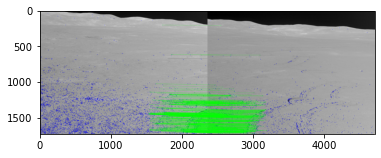

True

In [142]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = (0,0,255),
                   matchesMask = matchesMask, # draw only inliers
                   flags = 0)
img4 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.imshow(img4, 'gray'),plt.show()
cv.imwrite("img4.png", img4, [cv.IMWRITE_PNG_COMPRESSION, 0])

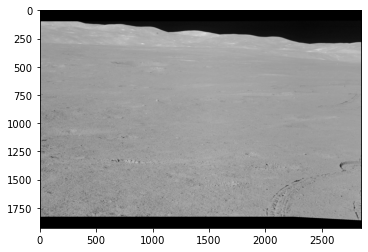

True

In [147]:
top, bot, left, right = 100, 100, 0, 500
srcImg = cv.copyMakeBorder(img1, top, bot, left, right, cv.BORDER_CONSTANT, value=(0, 0, 0))
testImg = cv.copyMakeBorder(img2, top, bot, left, right, cv.BORDER_CONSTANT, value=(0, 0, 0))
rows, cols = srcImg.shape[:2]
warpImg = cv.warpPerspective(testImg, np.array(M), (testImg.shape[1], testImg.shape[0]), flags=cv.WARP_INVERSE_MAP)
for col in range(0, cols):
    if srcImg[:, col].any() and warpImg[:, col].any():
        left = col
        break
for col in range(cols-1, 0, -1):
    if srcImg[:, col].any() and warpImg[:, col].any():
        right = col
        break
res = np.zeros([rows, cols, 3], np.uint8)
for row in range(0, rows):
    for col in range(0, cols):
        if not srcImg[row, col].any():
            res[row, col] = warpImg[row, col]
        elif not warpImg[row, col].any():
            res[row, col] = srcImg[row, col]
        else:
            srcImgLen = float(abs(col - left))
            testImgLen = float(abs(col - right))
            alpha = srcImgLen / (srcImgLen + testImgLen)
            res[row, col] = np.clip(srcImg[row, col] * (1-alpha) + warpImg[row, col] * alpha, 0, 255)
# opencv is bgr, matplotlib is rgb
res = cv.cvtColor(res, cv.COLOR_BGR2RGB)
# show the result
plt.figure()
plt.imshow(res)
plt.show()
cv.imwrite("result.png", res, [cv.IMWRITE_PNG_COMPRESSION, 0])

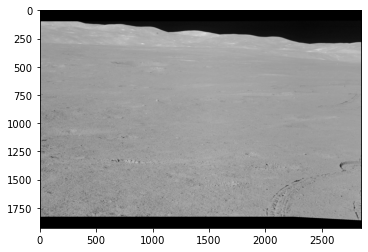

In [144]:
rows, cols = srcImg.shape[:2]
MIN_MATCH_COUNT = 10
if len(good) > MIN_MATCH_COUNT:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
    warpImg = cv.warpPerspective(testImg, np.array(M), (testImg.shape[1], testImg.shape[0]), flags=cv.WARP_INVERSE_MAP)

    for col in range(0, cols):
        if srcImg[:, col].any() and warpImg[:, col].any():
            left = col
            break
    for col in range(cols-1, 0, -1):
        if srcImg[:, col].any() and warpImg[:, col].any():
            right = col
            break

    res = np.zeros([rows, cols, 3], np.uint8)
    for row in range(0, rows):
        for col in range(0, cols):
            if not srcImg[row, col].any():
                res[row, col] = warpImg[row, col]
            elif not warpImg[row, col].any():
                res[row, col] = srcImg[row, col]
            else:
                srcImgLen = float(abs(col - left))
                testImgLen = float(abs(col - right))
                alpha = srcImgLen / (srcImgLen + testImgLen)
                res[row, col] = np.clip(srcImg[row, col] * (1-alpha) + warpImg[row, col] * alpha, 0, 255)

    # opencv is bgr, matplotlib is rgb
    res = cv.cvtColor(res, cv.COLOR_BGR2RGB)
    # show the result
    plt.figure()
    plt.imshow(res)
    plt.show()
else:
    print("Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT))
    matchesMask = None

In [146]:
cv.imwrite("result.png", res, [cv.IMWRITE_PNG_COMPRESSION, 0])

True

# 整合成函数

In [151]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 10

def merge(img_filename1, img_filename2):
    # 读入两张待匹配图片
    img1 = cv.imread(img_filename1,0)
    img2 = cv.imread(img_filename2,0)

    # 初始化SIFT探测器
    sift = cv.SIFT_create()
    
    # 用SIFT算法找出关键点及其信息
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)
    flann = cv.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1,des2,k=2)
    
    # 用Lowe算法筛取优质匹配点，0.4表示高精度匹配
    good = []
    for m,n in matches:
        if m.distance < 0.4*n.distance:
            good.append(m)
    
    # 有足够的匹配点后，绘制镶嵌变换
    if len(good)>MIN_MATCH_COUNT:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
        M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
        matchesMask = mask.ravel().tolist()
        #根据镶嵌变换绘制边框
        #h,w,d = img1.shape
        #h,w = img1.shape
        #pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        #dst = cv.perspectiveTransform(pts,M)
        #img3 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
    else:
        print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
        matchesMask = None

    # 将两图联排，绘制匹配和孤立点
    draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                    singlePointColor = (0,0,255),
                    matchesMask = matchesMask, # draw only inliers
                    flags = 0)
    img4 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
    plt.imshow(img4, 'gray'),plt.show()
    cv.imwrite("img4.png", img4, [cv.IMWRITE_PNG_COMPRESSION, 0])

    # 根据矩阵进行镶嵌拼合
    top, bot, left, right = 100, 100, 0, 500
    srcImg = cv.copyMakeBorder(img1, top, bot, left, right, cv.BORDER_CONSTANT, value=(0, 0, 0))
    testImg = cv.copyMakeBorder(img2, top, bot, left, right, cv.BORDER_CONSTANT, value=(0, 0, 0))
    rows, cols = srcImg.shape[:2]
    warpImg = cv.warpPerspective(testImg, np.array(M), (testImg.shape[1], testImg.shape[0]), flags=cv.WARP_INVERSE_MAP)
    for col in range(0, cols):
        if srcImg[:, col].any() and warpImg[:, col].any():
            left = col
            break
    for col in range(cols-1, 0, -1):
        if srcImg[:, col].any() and warpImg[:, col].any():
            right = col
            break
    res = np.zeros([rows, cols, 3], np.uint8)
    for row in range(0, rows):
        for col in range(0, cols):
            if not srcImg[row, col].any():
                res[row, col] = warpImg[row, col]
            elif not warpImg[row, col].any():
                res[row, col] = srcImg[row, col]
            else:
                srcImgLen = float(abs(col - left))
                testImgLen = float(abs(col - right))
                alpha = srcImgLen / (srcImgLen + testImgLen)
                res[row, col] = np.clip(srcImg[row, col] * (1-alpha) + warpImg[row, col] * alpha, 0, 255)
    # opencv is bgr, matplotlib is rgb
    res = cv.cvtColor(res, cv.COLOR_BGR2RGB)
    # show the result
    plt.figure()
    plt.imshow(res)
    plt.show()
    cv.imwrite("result.png", res, [cv.IMWRITE_PNG_COMPRESSION, 0])

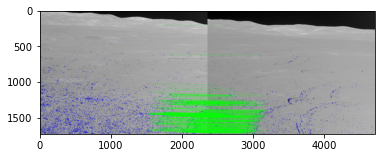

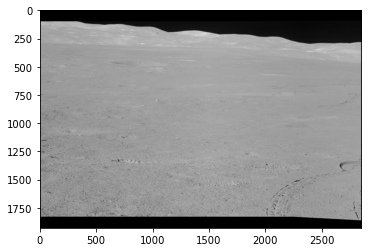

In [149]:
merge('CE4_GRAS_PCAML-C-000_SCI_N_20190708043358_20190708043358_0048_B_1.png', 
      'CE4_GRAS_PCAML-C-001_SCI_N_20190708043517_20190708043517_0048_B_1.png')

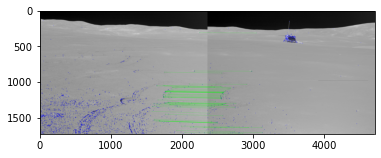

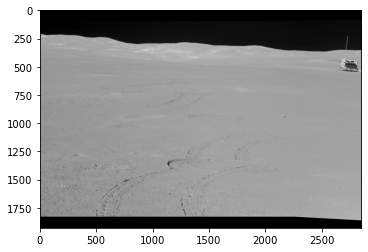

In [153]:
merge('CE4_GRAS_PCAML-C-001_SCI_N_20190708043517_20190708043517_0048_B_1.png', 
      'CE4_GRAS_PCAML-C-002_SCI_N_20190708043636_20190708043636_0048_B_1.png')

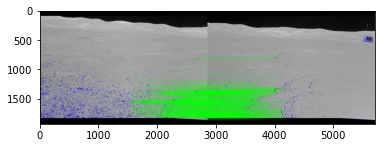

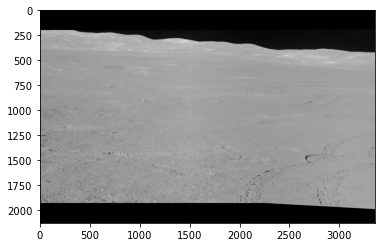

In [154]:
merge('result1.png', 
      'result2.png')